<a href="https://colab.research.google.com/github/gabrielasenareis/Portfolio/blob/main/Projeto_3_Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RESUMO DO PROJETO**

# DECLARAÇÃO DO PROBLEMA

Esse dataframe contém dados de consumo de energia de clientes, e a partir desses dados vou separar os consumidores em grupos distintos por similaridade, com o objetivo de entender o comportamento dos clientes relacionado ao seu consumo de energia.


# DESCRIÇÃO DAS VARIÁVEIS

**Variáveis Categóricas:**

*   **date:** Data no formato dd/mm/aaaa

*   **time:** Hora no formato hh:mm



**Variáveis Numéricas**:

*   **global_active_power:** Potência ativa média por minuto da casa (em quilowatt)

*   **global_reactive_power:** Potência reativa média por minuto da casa (em quilowatt)

*   **voltage:** Voltagem média por minuto (em volts)

*   **global_intensity:** Intensidade de corrente média por minuto da casa (em ampere)

*   **sub_metering_1:** Submedição de energia nº 1 (em watt-hora de energia ativa).
Corresponde à cozinha, contendo principalmente uma lava-louças, um forno e um micro-ondas (os fogões não são elétricos, mas a gás).

*   **sub_metering_2:** Submedição de energia nº 2 (em watt-hora de energia ativa).
Corresponde à lavanderia, contendo uma máquina de lavar roupa, uma secadora, um refrigerador e uma luz.

*   **sub_metering_3:** Submedição de energia nº 3 (em watt-hora de energia ativa). Corresponde a um aquecedor de água elétrico e um ar-condicionado.

# Para alcançar esse objetivo segui os seguintes passos:



1. **Análise Exploratória de Dados (EDA)**:

*  **Análise de Váriáveis**:

Explorei os dados para verificar a presença de valores nulos e duplicados. Verifiquei também se os dados categóricos e numéricos estavam sendo lidos no dataset de acordo com seu tipo.  

*   **Análise Univariada**:

Visualizei a distribuição das variáveis numéricas para entender a dispersão e tendência central.




2. **Limpeza e Tratamento dos Dados**:

*   **Tratamento de Valores Ausentes**:

Como a quantidade de valores ausentes eram insignificativas em relação a quantidade de registros (1% dos valores totais), dropei os valores missing.


*   **Codificação das Variáveis:**

Dropei as colunas "time" e "date" então, todas as variáveis que utilizei no modelo eram numéricas, porém estavam sendo lidas como strings, por isso fiz uma transformação manual de 'object' para 'float64'.


*   **Normalização dos Dados:**

Os dados das colunas numéricas apresentaram uma distribuição assimétrica, então utilizei a transformação logarítmica e de raíz quadrada pra aproximar a distribuição de uma forma mais normal, porém praticamente todos os valores se tornaram valores ausentes NaN. Como o resultado do cluster foi aproximadamente 80% de 'acurácia' mesmo com essa distribuição assimétrica, mantive dessa forma.


3. **Pré processamento e Divisão dos Dados:**

Atribui os valores do dataframe a uma variável, e usando a função train test split, separei apenas 1% dos valores para usar na criação do modelo. O modelo contém mais de 2 milhões de registros, por isso, 1% (que corresponde a 20 mil registros) é suficiente pro treinamento, sem exigir demais na sua execução.

4. **Redução de dimensionalidade:**

A redução de dimensionalidade é uma função que junta diversas variáveis em uma, de acordo com seu grau de correlação. É ideal para de usar quando um conjunto de dados tem muitas variáveis. Não foi esse caso, pois contem apenas 7 colunas. Mas quis utilizar mesmo assim, pois com o 'pca' o modelo resultou num silhuette score maior.

5. **Curva de Elbow:**

A curva de elbow (ou método do cotovelo) é uma técnica utilizada para ajudar a determinar o número ótimo de clusters em um conjunto de dados. Usando o algoritmo KMeans pra fazer a clusterização eu preciso informar a quantidade de clusters que vão ser criadas, por isso a necessidade de descobrir esse valor.
Na curva de elbow a idéia é encontrar um equilíbrio entre a quantidade de clusters e quanto dos dados ele consegue explicar. Nesse caso, a partir de 8 clusters eu percebi que a quantidade dos dados explicados se mantinha a mesma.

Pra criação da curva de elbow, precisei selecionar primeiro o range de 'K' que seriam testados, depois criei uma lista de modelos KMeans, cada um treinado com os números do range pré definido, depois calculei o centróide de cada modelo, pra conseguir a partir disso calcular a distância euclidiana entre cada ponto de dados, depois encontrei a menor distância entre cada ponto de dados e partir disso calculei a soma dos quadrados das distâncias, variável necessária pra criação do gráfico, e por fim, calculei a soma total dos quadrados das distâncias ( Esta soma total é uma referência para comparar a soma dos quadrados intra-cluster).



6. **Criação e Avaliação do Modelo de Machine Learning:**

Para a construção do modelo de machine learning, optei por utilizar o algoritmo KMeans. É um algoritmo de aprendizado não-supervisionado, que utiliza um método de separar os dados em torno de centros.

*  **Criação:**

  Com o melhor número de cluster descoberto através da curva de elbow, criei o modelo, nesse caso, com 8 clusters.

*  **Avaliação:**

  Utilizei a métrica de silhouette score para medir a eficácia do modelo criado. O resultado final do modelo foi de, aproximadamente, 80%.

* **Criação do Dataframe:**

  Criei um novo dataframe com os registros que foram utilizados na criação do modelo, e incluí uma coluna com a relação dos clusters. Dessa forma, consigo agrupar os valores dos clusters de acordo com cada coluna.


7. **Estudo dos Clusters:**

Através do dataframe criado agrupei os clusters por cada categoria de uso de aparelhos elétricos e agrupei também por sua média de gasto de energia.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, silhouette_score
from scipy.spatial.distance import cdist, pdist
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving consumo_energia.txt to consumo_energia.txt


In [ ]:
df = pd.read_csv('consumo_energia.txt', sep = ';')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# Análise Exploratória dos Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
df.shape

(2075259, 9)

In [ ]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64



*   Verificando se existem duplicados




In [ ]:
df.duplicated().sum()

0

*  Verificando a destribuição das variáveis numéricas

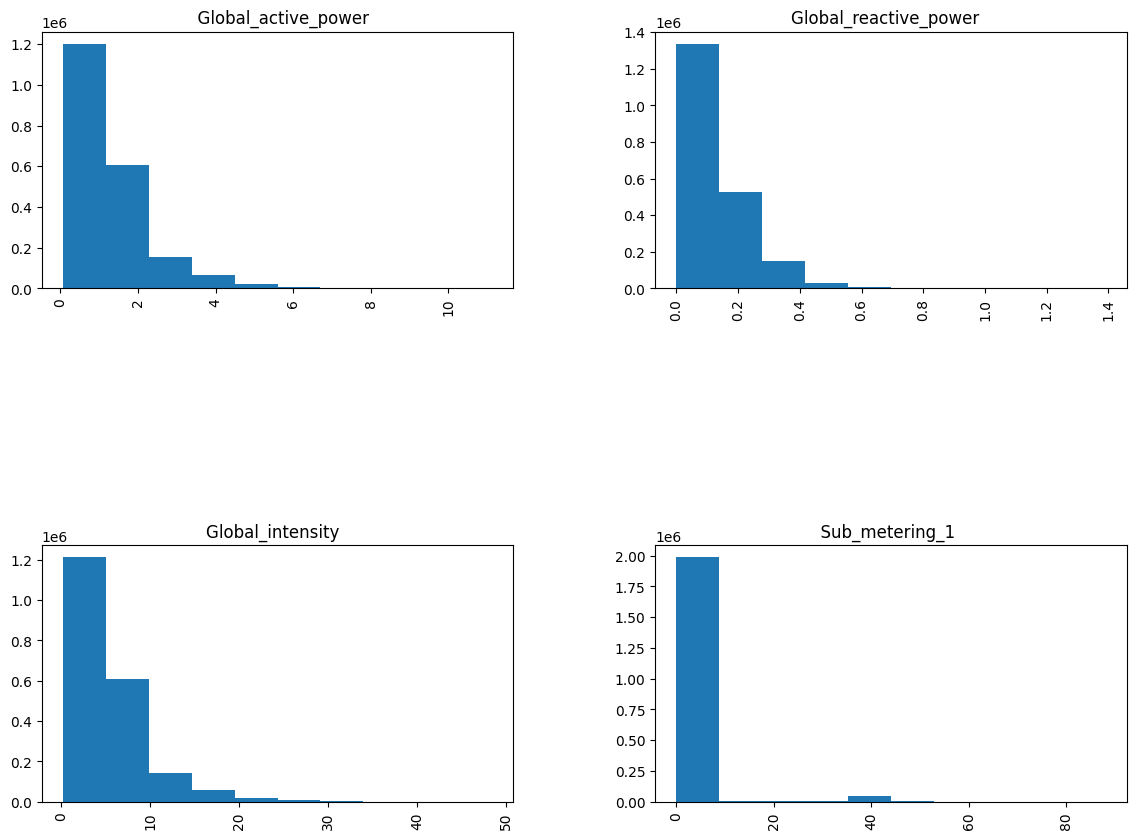

In [ ]:
plt.figure(figsize=(14, 10))


plt.subplot(2, 2, 1)
plt.hist(df.Global_active_power)
plt.title('  Global_active_power')
plt.xticks(rotation='vertical')

plt.subplot(2, 2, 2)
plt.hist(df.Global_reactive_power)
plt.title('Global_reactive_power  ')
plt.xticks(rotation='vertical')

plt.subplot(2, 2, 3)
plt.hist(df.Global_intensity)
plt.title('Global_intensity  ')
plt.xticks(rotation='vertical')

plt.subplot(2, 2, 4)
plt.hist(df.Sub_metering_1 )
plt.title('  Sub_metering_1   ')
plt.xticks(rotation='vertical')




plt.subplots_adjust(hspace=1, wspace=0.3)

plt.show()



*   Os gráficos tem uma cauda assimétrica à direita, porém ao fazer a transformação logarítimica ou com raíz quadrada, acabou gerando muitos valores missing. Em algumas colunas, todos os valores foram transformados em NaN. Provavelmente por serem valores muito baixos.




# Tratamento dos Dados



*   de 2 milhões de registros existem 25 mil valores nulos, isso corresponde a 1,25% dos registros. Então irei apenas dropar esses valores, porque a sua quantidade não é significativa




In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

*   Vou dropar as duas primeira colunas porque a data e hora nesse estudo não são dados importantes

In [ ]:
df = df.drop(columns=['Date', 'Time'])
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0




*   Corrigindo o tipo das variáveis. São números mas estavam sendo lidas como strings.



In [ ]:
df['Global_active_power'] = df['Global_active_power'].astype(dtype = 'float')
df['Global_reactive_power'] = df['Global_reactive_power'].astype(dtype = 'float')
df['Voltage'] = df['Voltage'].astype(dtype = 'float')
df['Global_intensity'] = df['Global_intensity'].astype(dtype = 'float')
df['Sub_metering_1'] = df['Sub_metering_1'].astype(dtype = 'float')
df['Sub_metering_2'] = df['Sub_metering_2'].astype(dtype = 'float')
df['Sub_metering_3'] = df['Sub_metering_3'].astype(dtype = 'float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB


# Pré-Processamento dos Dados

In [ ]:
df_atrib = df.values



*   Separando uma amostra de 1% dos dados para a criação do modelo.



In [ ]:
amostra1, amostra2 = train_test_split(df_atrib, train_size = .01)

In [ ]:
amostra1.shape

(20492, 7)

# Redução de Dimensionalidade



*   Aplicando redução de dimensionalidade. Esse método utiliza Algebra Linear pra identificar semelhança entre os dados e assim "juntar" as variaveis, medindo a semelhança pela variância. É ideal para de usar quando um conjunto de dados tem muitas variáveis. Não foi esse caso, pois contem apenas 7 colunas. Mas quis utilizar mesmo assim, pois com o 'pca' o modelo resultou num score maior.



In [ ]:
pca = PCA(n_components = 2).fit_transform(amostra1)

# Criação da curva de Elbow


*   Todo o processo que vai ser feito aqui é para conseguir gerar no final o gráfico da curva de elbow. Que é o gráfico que vai mostrar qual a quantidade de clusters conseguem descrever determinada porcentagem dos dados, e apartir daí consigo saber qual a quantidade ideal de clusters para usar no meu modelo.


*   Primeiro, determino um range de k para ser testado



In [ ]:
k_range = range(1,12)

*   Aplicando o modelo K-Means para cada valor de K

In [ ]:
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]



*   Ajustando o centróide do cluster para cada modelo



In [ ]:
centroids = [X.cluster_centers_ for X in k_means_var]



*    Calculando a distância euclidiana de cada ponto de dado para o centróide



In [ ]:
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]



*   Soma dos quadrados das distâncias dentro do cluster



In [ ]:
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

*   Soma total dos quadrados



In [ ]:
soma_total = sum(pdist(pca)**2)/pca.shape[0]

In [ ]:
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

In [ ]:
print(len(k_range))
print(len(soma_quadrados_inter_cluster/soma_total * 100))

11
11


Text(0.5, 1.0, 'Variância Explicada x Valor de K')

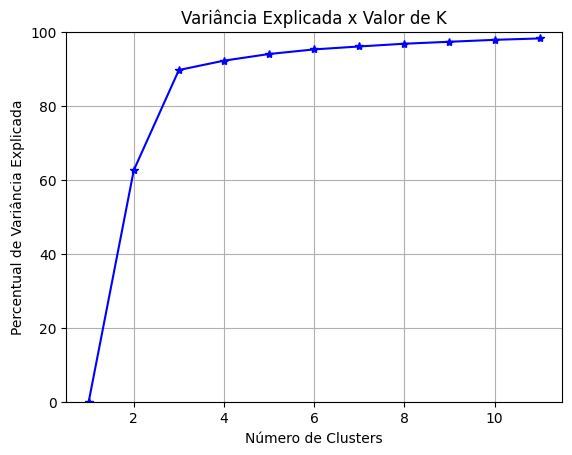

In [ ]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

*  A partir de "8" a quantidade de dados explicados se manteve praticamente a mesma.

# Criação do Modelo



*   Criando um modelo com K = 8


In [ ]:
modelo_v1 = KMeans(n_clusters = 8)
modelo_v1.fit(pca)

KMeans()



*   Criação da Silhouette Score, métrica usada para avaliar a "acurácia" do modelo.



In [ ]:
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.7923907017259189

*   Criando um dataframe com os clusters


In [43]:
names = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df_cluster = pd.DataFrame(amostra1, columns = names)
df_cluster['cluster'] = modelo_v1.labels_

In [45]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20492 entries, 0 to 20491
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    20492 non-null  float64
 1   Global_reactive_power  20492 non-null  float64
 2   Voltage                20492 non-null  float64
 3   Global_intensity       20492 non-null  float64
 4   Sub_metering_1         20492 non-null  float64
 5   Sub_metering_2         20492 non-null  float64
 6   Sub_metering_3         20492 non-null  float64
 7   cluster                20492 non-null  int32  
dtypes: float64(7), int32(1)
memory usage: 1.2 MB


# Estudo dos clusters

*  Calculando qual a quantidade de cada cluster em relação a categoria "sub_metering_1"

In [46]:
df_cluster.groupby('cluster')['Sub_metering_1'].count()

cluster
0      564
1    12884
2      211
3     5519
4      344
5      300
6      222
7      448
Name: Sub_metering_1, dtype: int64

**Observa-se a distribuição dos usuários de energia dessa categoria. Nesse caso corresponde à cozinha, contendo principalmente uma lava-louças, um forno e um micro-ondas, e o maior número de usuários desse padrão está no cluster "1"**

*  Calculando qual a quantidade de cada cluster em relação a categoria "sub_metering_2"

In [47]:
df_cluster.groupby('cluster')['Sub_metering_2'].count()

cluster
0      564
1    12884
2      211
3     5519
4      344
5      300
6      222
7      448
Name: Sub_metering_2, dtype: int64

**O resultado da a distribuição dos usuários de energia dessa categoria foram iguais ao anterior. Nesse caso corresponde à lavanderia, contendo uma máquina de lavar roupa, uma secadora, um refrigerador e uma luz, e o maior número de usuários desse padrão também está no cluster "1"**

*  Calculando qual a quantidade de cada cluster em relação a categoria "sub_metering_3"

In [48]:
df_cluster.groupby('cluster')['Sub_metering_3'].count()

cluster
0      564
1    12884
2      211
3     5519
4      344
5      300
6      222
7      448
Name: Sub_metering_3, dtype: int64

**O resultado da a distribuição dos usuários de energia dessa categoria também foram iguais ao anterior. Nesse caso corresponde a um aquecedor de água elétrico e um ar-condicionado, e o maior número de usuários desse padrão também está no cluster "1"**

*  Calculando a média de Voltagem por cluster

In [49]:
df_cluster.groupby('cluster')['Voltage'].mean()

cluster
0    238.209699
1    241.623442
2    238.035071
3    239.904954
4    236.732413
5    237.712300
6    238.567477
7    240.648728
Name: Voltage, dtype: float64

*  Calculando a média de consumo de energia por cluster

In [50]:
df_cluster.groupby('cluster')['Global_active_power'].mean()

cluster
0    3.097376
1    0.510212
2    3.332531
3    1.705798
4    4.648692
5    3.798513
6    2.570369
7    1.095286
Name: Global_active_power, dtype: float64



**Observa-se que apesar do cluster '1' conter o maior uso dos mais distintos aparelhos elétricos, a sua média de consumo de energia é baixa em comparação com os outros clusters. O grupo '4' é o que tem a maior média de consumo.**

